-----------------------------------------
organic
-----------------------------------------
shape angMomTot (3,)
k:  [0.9515281  0.30598536 0.0311003 ]
j:  [0.32157258995097276, 1, 0]
i:  [ 0.0311003 -0.010001  -0.8531316]
K_tot:  28501792515.963
R=0 count: 0
Krot_co 5543794351.718721
K_co 0.1945068664931796
-------------------------------------------------
shape angMomTot (3,)
k:  [ 0.65267355 -0.15264495  0.74210293]
j:  [-0.2338764076937788, 1, 0]
i:  [ 0.74210293  0.17356037 -0.6169735 ]
K_tot:  118196994376.26611
R=0 count: 0
Krot_co 36356139543.57174
K_co 0.30758937429353134
-------------------------------------------------
shape angMomTot (3,)
k:  [ 0.28733915  0.50012508 -0.81689113]
j:  [1.7405392708832192, 1, 0]
i:  [-0.81689113  1.42183109  0.58314819]
K_tot:  442805445777.5411
R=0 count: 0
Krot_co 140833728810.54977
K_co 0.318048773233251
-------------------------------------------------
shape angMomTot (3,)
k:  [-0.0927266   0.99391521  0.05945022]
j:  [-10.71877116916816,

shape angMomTot (3,)
k:  [ 0.43246331  0.40074935 -0.80769762]
j:  [0.9266667197416606, 1, 0]
i:  [-0.80769762  0.7484665  -0.06110222]
K_tot:  24635953411126.45
R=0 count: 1
Krot_co 10389803728216.52
K_co 0.42173337296230334
-------------------------------------------------
shape angMomTot (3,)
k:  [ 0.42238713  0.59853831 -0.68069156]
j:  [1.417037267473353, 1, 0]
i:  [-0.68069156  0.96456531  0.42576396]
K_tot:  35147522780201.254
R=0 count: 1
Krot_co 15894245156781.168
K_co 0.45221523167301175
-------------------------------------------------
shape angMomTot (3,)
k:  [ 0.42571865  0.71234153 -0.55797238]
j:  [1.673268310178513, 1, 0]
i:  [-0.55797238  0.9336375   0.76621985]
K_tot:  40343164627109.74
R=0 count: 1
Krot_co 18633430200263.95
K_co 0.4618732906179275
-------------------------------------------------
shape angMomTot (3,)
k:  [ 0.40161615  0.73286378 -0.549195  ]
j:  [1.824786601485083, 1, 0]
i:  [-0.549195    1.00216368  0.93570385]
K_tot:  54328413320479.88
R=0 count: 1

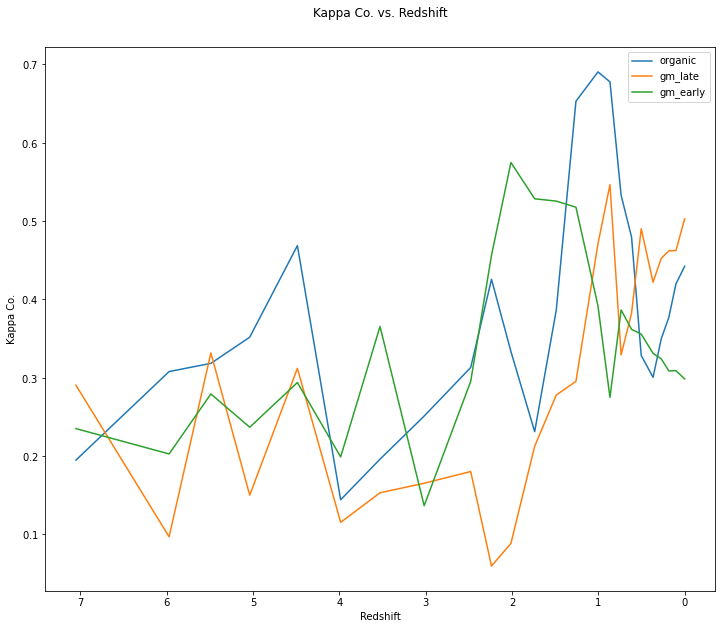

In [2]:
import h5py
import matplotlib.pyplot as plt
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.gridspec as gridspec
import numpy as np
import re

axisScale = 0.03
datasets = ['organic', 'gm_late', 'gm_early']

datasetNo = 0

# define storage arrays and reshape to hold all three galaxy type data
redshifts = np.array(range(3*24), dtype=float)
redshifts.shape = (3, 24)
kco_s = np.array(range(3*24), dtype=float)
kco_s.shape = (3, 24)

for dataset in datasets:
    print('-----------------------------------------')
    print(dataset)
    print('-----------------------------------------')
    
    files = listdir('data/' + dataset)

    count = 0
    
    for file in files:
    #if 1==1:



        #file = 'star_particles_015_z002p012.hdf5'
        #file = 'star_particles_028_z000p000.hdf5'
        
        # get redshift from the filename
        m = re.search('(z[0-9])\w+', file)
        s = m.group(0).replace('z', '')
        s = s.replace('p', '.')
        redshift = float(s)
        
        # load data for a particular galaxy at a particular redshift
        f = h5py.File('data/' + dataset + '/' + file,'r')

        # extract data from the file
        ds_c = f['Coordinates']
        ds_v = f['Velocity']
        ds_m = f['Mass']
    

        # Calculate the resultant angular momentum vectors r
        # r contains the angular momentum vectors for each particle per redshift era
        r0 = np.cross(ds_c, ds_v)
        r = np.transpose(np.multiply(ds_m, np.transpose(r0)))
        #print ("shape r", np.shape(r))
        
        # Calculate the total angular momentum vector by summing the vectors (per redshift epoch)
        angMomTot = np.sum(r, axis=0)
        print ("shape angMomTot", np.shape(angMomTot)) 
        
        # Calculate the magnitude of the total angular momentum vector for each redshift epoch
        # We use this to normalise the angular momentum to a unit vector for scaling during the transform
        magnitude = np.linalg.norm(angMomTot)
        
        # Alternative way of calculating the magnitude
        # magnitude2 = np.sqrt(angMomTot[0]**2 + angMomTot[1]**2 + angMomTot[2]**2)
        
        # Calculate the scale factor by working out the angular momentum 
        unitVect_z = angMomTot / magnitude
        #print ("unitVect_z", unitVect_z)
        #print ("np.linalg.norm(unitVect_z)", np.linalg.norm(unitVect_z))
        
        
        # the angular momentum's vector's (unitVect_z) direction is directly out of the plane of the galaxy
        # unitVect_z = k, but j = [-k2/k1, 1, 0], so
        
        k = unitVect_z
        print ("k: ", k)
        
        j = [k[1]/k[0], 1, 0]
        print ("j: ", j)
        
        i = np.cross(j, unitVect_z)
        print ("i: ", i)
        
        
        # transform co-ordinates
        dsc_x_trsfrm = np.dot(ds_c, i)
        #print ("dsc_x_trsfrm", dsc_x_trsfrm)
        #print ("dsc_x_trsfrm shape", np.shape(dsc_x_trsfrm))
        
        dsc_y_trsfrm = np.dot(ds_c, j)
        #print ("dsc_y_trsfrm", dsc_y_trsfrm)
        #print ("dsc_y_trsfrm shape", np.shape(dsc_y_trsfrm))
        
        dsc_z_trsfrm = np.dot(ds_c, k)
        #print ("dsc_z_trsfrm", dsc_z_trsfrm)
        #print ("dsc_z_trsfrm shape", np.shape(dsc_z_trsfrm))
        
        #dsc_trans = list(zip(dsc_x_trsfrm, dsc_y_trsfrm, dsc_z_trsfrm))
        dsc_trans = np.transpose(np.array([dsc_x_trsfrm, dsc_y_trsfrm, dsc_z_trsfrm]))
        
        #transform velocities
        dsv_x_trsfrm = np.dot(ds_v, i)
        #print ("dsv_x_trsfrm", dsv_x_trsfrm)
        #print ("dsv_x_trsfrm shape", np.shape(dsv_x_trsfrm))
        
        dsv_y_trsfrm = np.dot(ds_v, j)
        #print ("dsv_y_trsfrm", dsv_y_trsfrm)
        #print ("dsv_y_trsfrm shape", np.shape(dsv_y_trsfrm))
        
        dsv_z_trsfrm = np.dot(ds_v, k)
        #print ("dsv_z_trsfrm", dsv_z_trsfrm)
        #print ("dsv_z_trsfrm shape", np.shape(dsv_z_trsfrm))
        
        dsv_trans = np.transpose(np.array([dsv_x_trsfrm, dsv_y_trsfrm, dsv_z_trsfrm]))
        
        # Get transposed velocity in the x-y plane only
        ##dsv_trans = np.transpose(np.array([dsv_x_trsfrm, dsv_y_trsfrm, dsv_z_trsfrm]))
        
        #print results
        #print ("dsc_trans", dsc_trans)
        #print ("dsc_trans shape", np.shape(dsc_trans))
        
        #print ("dsc_trans[0,x]")
        #print (dsc_trans[0,0])
        #print ("dsc_trans[0,y]")
        #print (dsc_trans[0,1])
        #print ("dsc_trans[0,z]")
        #print (dsc_trans[0,2])        
        
        #print ("dsv_trans", dsv_trans)
        #print ("dsv_trans shape", np.shape(dsv_trans))
        
        #print ("dsv_trans[0,x]")
        #print (dsv_trans[0,0])
        #print ("dsv_trans[0,y]")
        #print (dsv_trans[0,1])
        #print ("dsv_trans[0,z]")
        #print (dsv_trans[0,2])  
       
        # Calculate KE of transformed particles
        # Get magnitudes of the vectors
        vel_magnitude = np.linalg.norm(dsv_trans, axis=1)

        # Calculate kinetic energy for all star particles
        K_tot = np.sum(0.5 * np.array(ds_m) * np.square(vel_magnitude))
        print ('K_tot: ', K_tot)
        ##specificKe = np.sum(0.5 * np.square(vel_magnitude))


        
        # Calculate R, the distance from the centre in the x-y plane
        R = np.sqrt(np.square(dsc_x_trsfrm) + np.square(dsc_y_trsfrm))
        #print ('R shape', np.shape(R))
        #print ('R:', R)
               
        # Calculate momentum 
        res = np.cross(dsc_trans, dsv_trans)
        momentum = np.transpose(np.multiply(ds_m, np.transpose(res)))
        ##momentum = np.multiply(ds_m, res)
        #print('Momentum shape:', np.shape(momentum))
        #print('Momentum',momentum)
        
        # Extract L_z
        L_z = np.array(momentum[:,2])
        #print('L_z:', L_z)    
        
        r0 = 0
        Krot_co = 0
        for n in range(0, len(ds_m)):
            if L_z[n] < 0:
                continue
            if R[n] == 0:
                r0 = r0 + 1
                continue
            Krot_co = Krot_co + (0.5 * ds_m[n] * np.square(L_z[n] / (ds_m[n]*R[n]) ))
        
        print('R=0 count:',r0)
        
        print('Krot_co',Krot_co)
        
        K_co = Krot_co / K_tot
        
        print('K_co',K_co)
        
        redshifts[datasetNo,count] = redshift
        kco_s[datasetNo,count] = K_co
              
        count = count + 1
        print ('-------------------------------------------------')
        
    # Next galaxy
    datasetNo = datasetNo + 1

plt.figure(figsize = (12,10))
plt.title('Kappa Co. vs. Redshift', pad=30)
plt.xlabel('Redshift')
plt.ylabel('Kappa Co.')
plt.ticklabel_format(axis='y', style='sci', useMathText=True)
#plt.semilogy()
for i in range(0,3):
   plt.plot(redshifts[i,0:], kco_s[i,0:])
plt.legend(['organic', 'gm_late', 'gm_early'])
plt.gca().invert_xaxis()
plt.show()      